In [58]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mapcalc
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, ConfusionMatrixDisplay

In [59]:
cardiomegaly_gt = pd.read_csv("cardiomegaly_merged_test.csv")

In [60]:
calculated = pd.read_csv("CLAHE_padding_test.csv")

In [61]:
#checking to see that calculated 

gt_img = cardiomegaly_gt["image_id"].tolist()
pred_img = calculated["file_name"].tolist()

print([x for x in gt_img if x not in pred_img]) #gt_img is 309 rows, checking to see they all exist in predictions (runs over all images)
print(len([x for x in pred_img if x not in gt_img]))

[]
2691


In [62]:
missing_ids = [x for x in pred_img if x not in gt_img]
list_to_append = []
for missing_id in missing_ids:
    list_to_append.append([missing_id, "No Finding", None, None, None, None])

df_to_concat = pd.DataFrame(list_to_append, columns=cardiomegaly_gt.columns)

cardiomegaly_gt_all_imgs = pd.concat([cardiomegaly_gt, df_to_concat], axis=0)

/var/folders/d0/k5pp1mc555bcl1qs6mvttwt40000gn/T/ipykernel_99292/2310306495.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cardiomegaly_gt_all_imgs = pd.concat([cardiomegaly_gt, df_to_concat], axis=0)


In [63]:
calculated = calculated.sort_values(by="file_name", axis=0)
cardiomegaly_gt_all_imgs = cardiomegaly_gt_all_imgs.sort_values(by="image_id", axis = 0)

In [64]:
cardiomegaly_gt_all_imgs["image_id"].to_list() == calculated["file_name"].to_list()

True

In [65]:
calculated["class_name"] = np.where(calculated["cardiomegaly"] == True, "Cardiomegaly", "No Finding")

In [66]:
print(classification_report(y_true=cardiomegaly_gt_all_imgs["class_name"], y_pred=calculated["class_name"]))

              precision    recall  f1-score   support

Cardiomegaly       0.38      0.77      0.51       309
  No Finding       0.97      0.86      0.91      2691

    accuracy                           0.85      3000
   macro avg       0.68      0.81      0.71      3000
weighted avg       0.91      0.85      0.87      3000



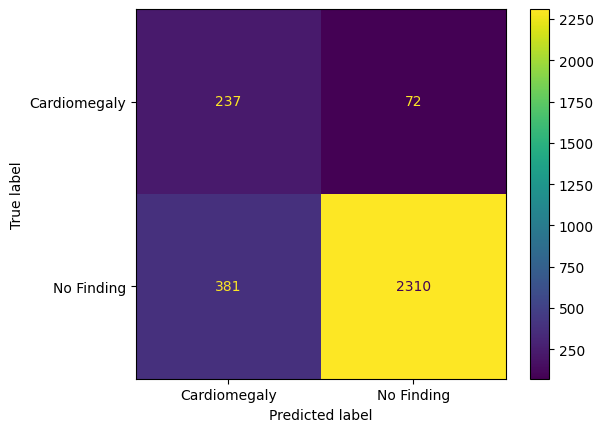

In [67]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_true=cardiomegaly_gt_all_imgs["class_name"], y_pred=calculated["class_name"], labels = ["Cardiomegaly", "No Finding"]), display_labels=["Cardiomegaly", "No Finding"])
disp.plot()
plt.show()

Trying to optimise threshold